# Machine Learning Predictive Model for Flight Pricing 
### DTSC 691 
### Machine Learning
### Project Proposal
### Bethlehem Alem 



#### Background

Traveling has become one of the biggest components of our lives to keep us connected to one another. There are different forms of transportation to travel to different places for different reasons. People travel for leisure, medical treatment, work, or other purposes by car, train, and, most importantly, air. Thousands of Americans travel by airplane every day. The federal aviation administration air route traffic control center reported that there are more than 674 million passengers in 2021 (BTS, 2022). For most people when considering flying by air it is important to get a fair price. There are many websites that tell us when to buy tickets to get a better-priced fare. These websites use AI to study all the data history, predict future rates, and show what day to buy tickets. 

The Bureau of transportation statistics has a database for all transportation means in the USA. It contains data from military aviation to bike/pedestrian databases. It also contains subjects that influence traveling experiences from safety to energy to environmental factors. The database is well organized and labeled to download specific attributes the user wanted in xls or pdf format. Their website makes the latest available data accessible to the public in an organized and alphabetically sorted-out way.  


#### General analytics

This project aims to collect and analyze flight data to accurately predict prices for flights from various attributes. The recorded data is more than one million rows and will be reduced by more than half. The price and distance in miles, including ten other columns, were taken from the Origin and Destination survey data. The data collection might be influenced by other factors like covid 19, But it will show us the best values in the past year. 


For this project, Jupyter notebook will be utilized for the majority of the data analyses.  A summary of descriptive statistics will be performed to identify key attributes that affect flight prices. Then, various ML predictive models will be implemented to discover a preferable algorithm that works with the data. Finally, a grid search will be performed to hyper-tune the models and increase accuracy.


In [1]:
# Common imports

import numpy as np
import pandas as pd

In [2]:

# To plot pretty figures, Only in Jupyter
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

The [os](https://docs.python.org/3/library/os.html) library provides miscellaneous operating system interfaces.  

In [3]:
import os

PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

# Function for saving images
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
def display_scores(scores):
    print("Scores:", scores)
    print()
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

## Get the Data and View/Inspect It

In [4]:
# Read in Data from excel datase
flight_info =pd.read_csv("Origin_and_Destination_Survey_DB1BMarket_2021_1.csv")

In [5]:
flight_info.shape

(1048575, 41)

In [6]:
data = flight_info

In [7]:
# Inspect Metadata on flight pricing Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 41 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   ItinID              1048575 non-null  float64
 1   MktID               1048575 non-null  float64
 2   MktCoupons          1048575 non-null  int64  
 3   Year                1048575 non-null  int64  
 4   Quarter             1048575 non-null  int64  
 5   OriginAirportID     1048575 non-null  int64  
 6   OriginAirportSeqID  1048575 non-null  int64  
 7   OriginCityMarketID  1048575 non-null  int64  
 8   Origin              1048575 non-null  object 
 9   OriginCountry       1048575 non-null  object 
 10  OriginStateFips     1048575 non-null  int64  
 11  OriginState         1048575 non-null  object 
 12  OriginStateName     1048575 non-null  object 
 13  OriginWac           1048575 non-null  int64  
 14  DestAirportID       1048575 non-null  int64  
 15  DestAirportSeqI

In [8]:
data.describe()

,ItinID,MktID,MktCoupons,Year,Quarter,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginStateFips,OriginWac,...,OpCarrierChange,BulkFare,Passengers,MktFare,MktDistance,MktDistanceGroup,MktMilesFlown,NonStopMiles,ItinGeoType,MktGeoType
count,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0,1048575.0,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,...,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.098081e+11,1.098081e+13,1.585457e+00,2021.0,1.0,1.292186e+04,1.292190e+06,3.213106e+04,2.631322e+01,5.475531e+01,...,2.858127e-01,8.487710e-05,1.967199e+00,1.942692e+02,1.346763e+03,3.200954e+00,1.344718e+03,1.236109e+03,1.914566e+00,1.914747e+00
std,9.359433e+10,9.359433e+12,5.592785e-01,0.0,0.0,1.532386e+03,1.532383e+05,1.424345e+03,1.683318e+01,2.693382e+01,...,4.518008e-01,9.212490e-03,6.909454e+00,1.589179e+02,8.079855e+02,1.640361e+00,8.072509e+02,7.563800e+02,2.795266e-01,2.792577e-01
min,2.021118e+06,2.021118e+08,1.000000e+00,2021.0,1.0,1.013500e+04,1.013506e+06,3.000900e+04,1.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,5.400000e+01,1.000000e+00,0.000000e+00,5.400000e+01,1.000000e+00,1.000000e+00
25%,2.021180e+10,2.021180e+12,1.000000e+00,2021.0,1.0,1.148100e+04,1.148102e+06,3.085200e+04,1.200000e+01,3.300000e+01,...,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+02,7.750000e+02,2.000000e+00,7.730000e+02,6.870000e+02,2.000000e+00,2.000000e+00
50%,2.021110e+11,2.021110e+13,2.000000e+00,2021.0,1.0,1.320400e+04,1.320402e+06,3.171400e+04,2.500000e+01,5.200000e+01,...,0.000000e+00,0.000000e+00,1.000000e+00,1.635000e+02,1.144000e+03,3.000000e+00,1.142000e+03,1.054000e+03,2.000000e+00,2.000000e+00
75%,2.021120e+11,2.021120e+13,2.000000e+00,2021.0,1.0,1.411200e+04,1.411206e+06,3.319800e+04,4.100000e+01,8.200000e+01,...,1.000000e+00,0.000000e+00,1.000000e+00,2.525000e+02,1.758000e+03,4.000000e+00,1.755000e+03,1.600000e+03,2.000000e+00,2.000000e+00
max,2.021120e+11,2.021120e+13,6.000000e+00,2021.0,1.0,1.686900e+04,1.686901e+06,3.610100e+04,7.800000e+01,9.300000e+01,...,1.000000e+00,1.000000e+00,1.070000e+03,2.877600e+04,9.766000e+03,2.000000e+01,9.766000e+03,8.102000e+03,2.000000e+00,2.000000e+00


In [9]:
# convert all coloumns with type float to type int except MKTFare
data.loc[:, ['ItinID', 'MktID']] = data.loc[:, ['ItinID', 'MktID']].astype(np.int64)
data.describe()

,ItinID,MktID,MktCoupons,Year,Quarter,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginStateFips,OriginWac,...,OpCarrierChange,BulkFare,Passengers,MktFare,MktDistance,MktDistanceGroup,MktMilesFlown,NonStopMiles,ItinGeoType,MktGeoType
count,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0,1048575.0,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,...,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.098081e+11,1.098081e+13,1.585457e+00,2021.0,1.0,1.292186e+04,1.292190e+06,3.213106e+04,2.631322e+01,5.475531e+01,...,2.858127e-01,8.487710e-05,1.967199e+00,1.942692e+02,1.346763e+03,3.200954e+00,1.344718e+03,1.236109e+03,1.914566e+00,1.914747e+00
std,9.359433e+10,9.359433e+12,5.592785e-01,0.0,0.0,1.532386e+03,1.532383e+05,1.424345e+03,1.683318e+01,2.693382e+01,...,4.518008e-01,9.212490e-03,6.909454e+00,1.589179e+02,8.079855e+02,1.640361e+00,8.072509e+02,7.563800e+02,2.795266e-01,2.792577e-01
min,2.021118e+06,2.021118e+08,1.000000e+00,2021.0,1.0,1.013500e+04,1.013506e+06,3.000900e+04,1.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,5.400000e+01,1.000000e+00,0.000000e+00,5.400000e+01,1.000000e+00,1.000000e+00
25%,2.021180e+10,2.021180e+12,1.000000e+00,2021.0,1.0,1.148100e+04,1.148102e+06,3.085200e+04,1.200000e+01,3.300000e+01,...,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+02,7.750000e+02,2.000000e+00,7.730000e+02,6.870000e+02,2.000000e+00,2.000000e+00
50%,2.021110e+11,2.021110e+13,2.000000e+00,2021.0,1.0,1.320400e+04,1.320402e+06,3.171400e+04,2.500000e+01,5.200000e+01,...,0.000000e+00,0.000000e+00,1.000000e+00,1.635000e+02,1.144000e+03,3.000000e+00,1.142000e+03,1.054000e+03,2.000000e+00,2.000000e+00
75%,2.021120e+11,2.021120e+13,2.000000e+00,2021.0,1.0,1.411200e+04,1.411206e+06,3.319800e+04,4.100000e+01,8.200000e+01,...,1.000000e+00,0.000000e+00,1.000000e+00,2.525000e+02,1.758000e+03,4.000000e+00,1.755000e+03,1.600000e+03,2.000000e+00,2.000000e+00
max,2.021120e+11,2.021120e+13,6.000000e+00,2021.0,1.0,1.686900e+04,1.686901e+06,3.610100e+04,7.800000e+01,9.300000e+01,...,1.000000e+00,1.000000e+00,1.070000e+03,2.877600e+04,9.766000e+03,2.000000e+01,9.766000e+03,8.102000e+03,2.000000e+00,2.000000e+00


In [10]:
# to return the sorted unique elements
data['OriginCountry'].unique()

array(['US'], dtype=object)

In [11]:
data

,ItinID,MktID,MktCoupons,Year,Quarter,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCountry,...,OpCarrier,BulkFare,Passengers,MktFare,MktDistance,MktDistanceGroup,MktMilesFlown,NonStopMiles,ItinGeoType,MktGeoType
0,20211243122,2021120000000,1,2021,1,14100,1410005,34100,PHL,US,...,AA,0,3,64.00,2402,5,2402,2402,2,2
1,20211243123,2021120000000,1,2021,1,12892,1289208,32575,LAX,US,...,AA,0,2,68.50,2402,5,2402,2402,2,2
2,20211243123,2021120000000,1,2021,1,14100,1410005,34100,PHL,US,...,AA,0,2,68.50,2402,5,2402,2402,2,2
3,20211243124,2021120000000,1,2021,1,12892,1289208,32575,LAX,US,...,AA,0,3,70.50,2402,5,2402,2402,2,2
4,20211243124,2021120000000,1,2021,1,14100,1410005,34100,PHL,US,...,AA,0,3,70.50,2402,5,2402,2402,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,202111000000,20211100000000,2,2021,1,11624,1162403,31624,EYW,US,...,99,0,1,376.50,1064,3,1064,849,2,2
1048571,202111000000,20211100000000,2,2021,1,10693,1069302,30693,BNA,US,...,99,0,1,152.46,1064,3,1064,849,2,2
1048572,202111000000,20211100000000,2,2021,1,11624,1162403,31624,EYW,US,...,YX,0,1,133.54,932,2,932,849,2,2
1048573,202111000000,20211100000000,2,2021,1,10693,1069302,30693,BNA,US,...,99,0,1,360.35,1064,3,1064,849,2,2


In [12]:
data['MktFare'].describe()

count    1.048575e+06
mean     1.942692e+02
std      1.589179e+02
min      0.000000e+00
25%      1.000000e+02
50%      1.635000e+02
75%      2.525000e+02
max      2.877600e+04
Name: MktFare, dtype: float64

## Data cleaning 

### For Presentation purpose drop random data 

In [13]:
# data is too big, dropping rows to optimize run speed 
np.random.seed(10)

remove_n = 1047575
drop_indices = np.random.choice(data.index, remove_n, replace=False)
data = data.drop(drop_indices)


#### Drop unnessasary columns to make it easy to work with.

In [14]:
#Drop unnessasary columns
flight_pricing = data.drop(['ItinID', 'MktID', 
                     'Year','Quarter','MktCoupons','OriginAirportSeqID','DestAirportSeqID',
                     'OriginCountry', 'OriginAirportID', 'OriginCityMarketID','OriginStateFips','OriginState', 'OriginWac',
                     'DestCountry', 'DestAirportID', 'DestCityMarketID', 'DestStateFips', 'DestState', 'DestWac',
                     'WacGroup', 'TkCarrierChange', 'TkCarrierGroup', 'OpCarrierChange', 'OpCarrierGroup',
                     'RPCarrier', 'OpCarrier', 'BulkFare', 'MktDistanceGroup', 'MktMilesFlown', 'NonStopMiles', 'ItinGeoType'], axis=1)

In [15]:
# Drop na
flight_pricing.dropna()

,Origin,OriginStateName,Dest,DestStateName,AirportGroup,TkCarrier,Passengers,MktFare,MktDistance,MktGeoType
503,LAX,California,PHX,Arizona,LAX:PHX,AA,1,235.00,370,2
2207,LAX,California,PHX,Arizona,LAX:PHX,AA,1,40.75,370,2
2854,AVL,North Carolina,LGA,New York,AVL:CLT:LGA,AA,1,77.00,635,2
5735,RAP,South Dakota,PBI,Florida,RAP:DFW:PBI,AA,1,176.00,1937,2
6137,RDU,North Carolina,DTW,Michigan,RDU:IAD:DTW,UA,1,179.00,607,2
...,...,...,...,...,...,...,...,...,...,...
1044642,AVP,Pennsylvania,ATL,Georgia,AVP:CLT:ATL,AA,1,82.00,735,2
1045021,AVP,Pennsylvania,TXK,Arkansas,AVP:CLT:DFW:TXK,AA,1,151.00,1626,2
1045403,MCO,Florida,AVP,Pennsylvania,MCO:CLT:AVP,AA,1,299.00,977,2
1047393,BHM,Alabama,MIA,Florida,BHM:CLT:MIA,AA,1,100.50,1000,2


In [16]:
# simple flight info
flight_pricing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 503 to 1048548
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Origin           1000 non-null   object 
 1   OriginStateName  1000 non-null   object 
 2   Dest             1000 non-null   object 
 3   DestStateName    1000 non-null   object 
 4   AirportGroup     1000 non-null   object 
 5   TkCarrier        1000 non-null   object 
 6   Passengers       1000 non-null   int64  
 7   MktFare          1000 non-null   float64
 8   MktDistance      1000 non-null   int64  
 9   MktGeoType       1000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 85.9+ KB


In [17]:
# see how the data looks
flight_pricing.describe()

,Passengers,MktFare,MktDistance,MktGeoType
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.858000,185.979230,1323.792000,1.921000
std,3.703181,145.335657,831.923097,0.269874
min,1.000000,3.260000,100.000000,1.000000
25%,1.000000,99.375000,731.000000,2.000000
50%,1.000000,159.650000,1104.000000,2.000000
75%,1.000000,240.500000,1770.750000,2.000000
max,69.000000,1279.000000,7533.000000,2.000000


In [18]:
flight_pricing.isna().sum()
# hence no need for imputation

Origin             0
OriginStateName    0
Dest               0
DestStateName      0
AirportGroup       0
TkCarrier          0
Passengers         0
MktFare            0
MktDistance        0
MktGeoType         0
dtype: int64

## Create a Test Set

 Use the train_test_split() method to separate our data into a training set and testing set.

In [19]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(flight_pricing, test_size=0.2, random_state=42)

In [20]:
train_set

,Origin,OriginStateName,Dest,DestStateName,AirportGroup,TkCarrier,Passengers,MktFare,MktDistance,MktGeoType
30392,SRQ,Florida,PIT,Pennsylvania,SRQ:PIT,G4,1,45.00,912,2
550386,SMF,California,ATL,Georgia,SMF:ATL,DL,1,173.50,2092,2
726263,DAY,Ohio,DAB,Florida,DAY:ATL:DAB,DL,1,5.00,798,2
574463,ATL,Georgia,TUS,Arizona,ATL:TUS,DL,1,311.00,1541,2
870743,ECP,Florida,ORF,Virginia,ECP:ATL:ORF,DL,1,415.00,756,2
...,...,...,...,...,...,...,...,...,...,...
102560,PHX,Arizona,GRR,Michigan,PHX:GRR,AA,1,136.02,1574,2
257223,GUC,Colorado,CLE,Ohio,GUC:DEN:CLE,UA,1,5.50,1353,2
896004,IAD,Virginia,ATL,Georgia,IAD:ATL,DL,3,5.50,534,2
459690,PDX,Oregon,PNS,Florida,PDX:ATL:PNS,DL,1,190.00,2443,2


In [21]:
# create training set with Mkfare
train_set_label = train_set["MktFare"].copy()

# create training set without Mkfare

del train_set['MktFare']
train_set.shape

(800, 9)

In [22]:
# create training set with Mkfare

test_set_label = test_set["MktFare"].copy()

# create training set without Mkfare

del test_set['MktFare']
test_set.shape

(200, 9)

# Visualizing Data

To understand the data better, plot histograms and understand corelation.

Saving figure attribute_histogram_plots


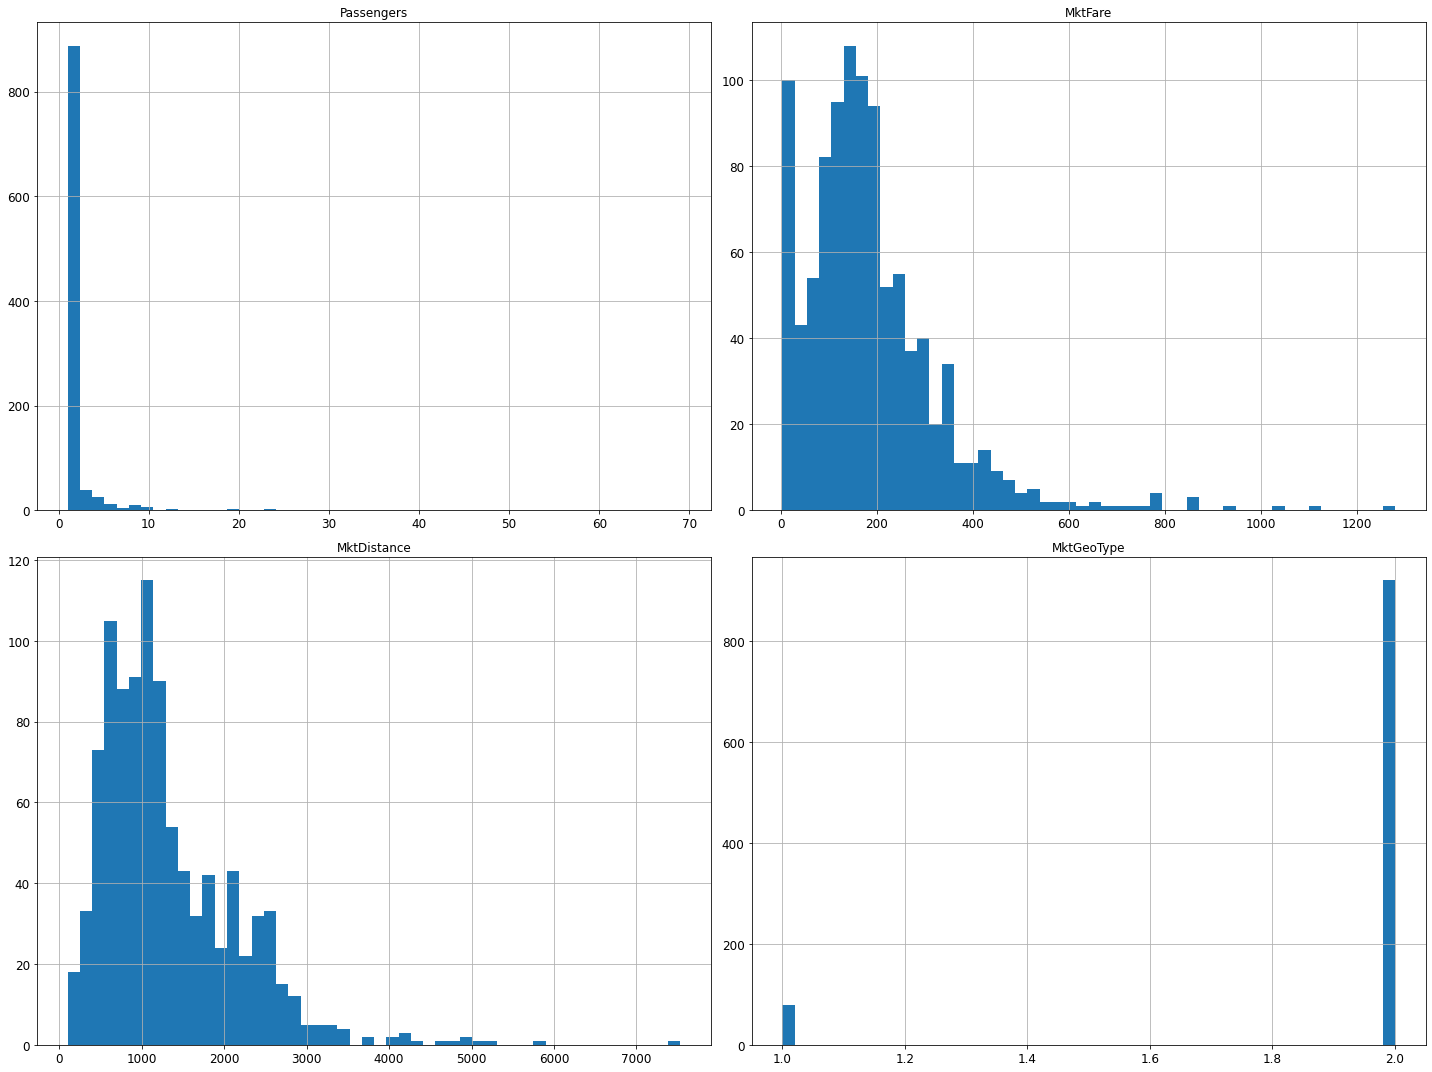

In [23]:
flight_pricing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

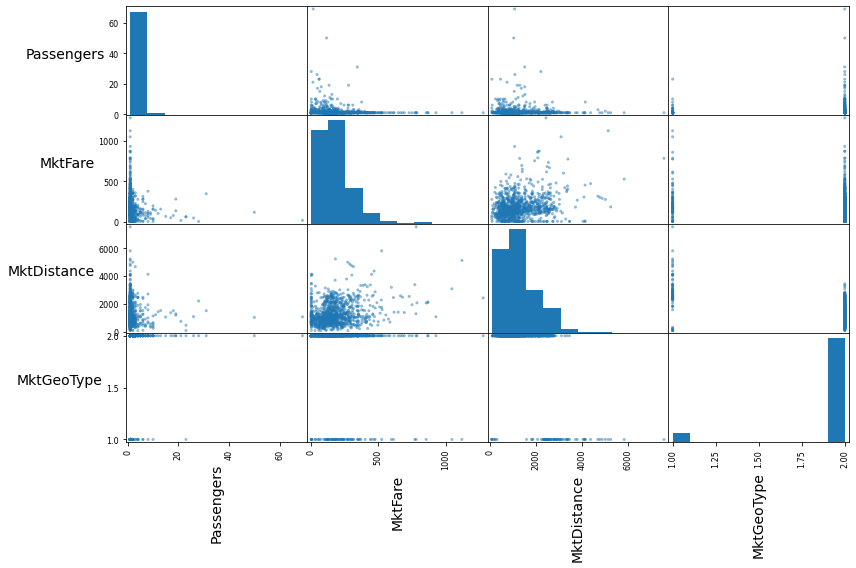

In [24]:
#plot all the numeric variables we have in the dataset against each other one.

from pandas.plotting import scatter_matrix

axes = scatter_matrix(flight_pricing,figsize=(12, 8))

for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

Saving figure MkFare_vs_MktDistance_scatterplot


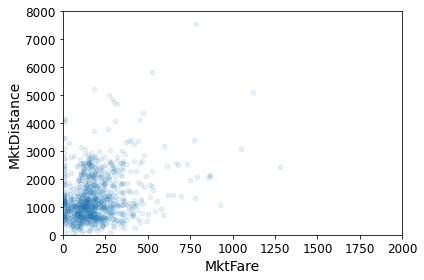

In [25]:
# Mktfare and MktDistance looks like they have a better correlation than others.
flight_pricing.plot(kind="scatter", x="MktFare", y="MktDistance", alpha=0.1)
plt.axis([0, 2000, 0, 8000])
save_fig("MkFare_vs_MktDistance_scatterplot")

In [26]:
# looking at the corelation, Mkt distance seems to have better correlation with MktFare
corr_matrix = flight_pricing.corr()
corr_matrix["MktFare"].sort_values(ascending=False)

MktFare        1.000000
MktDistance    0.268184
Passengers    -0.120501
MktGeoType    -0.147450
Name: MktFare, dtype: float64

Saving figure CountOriginState


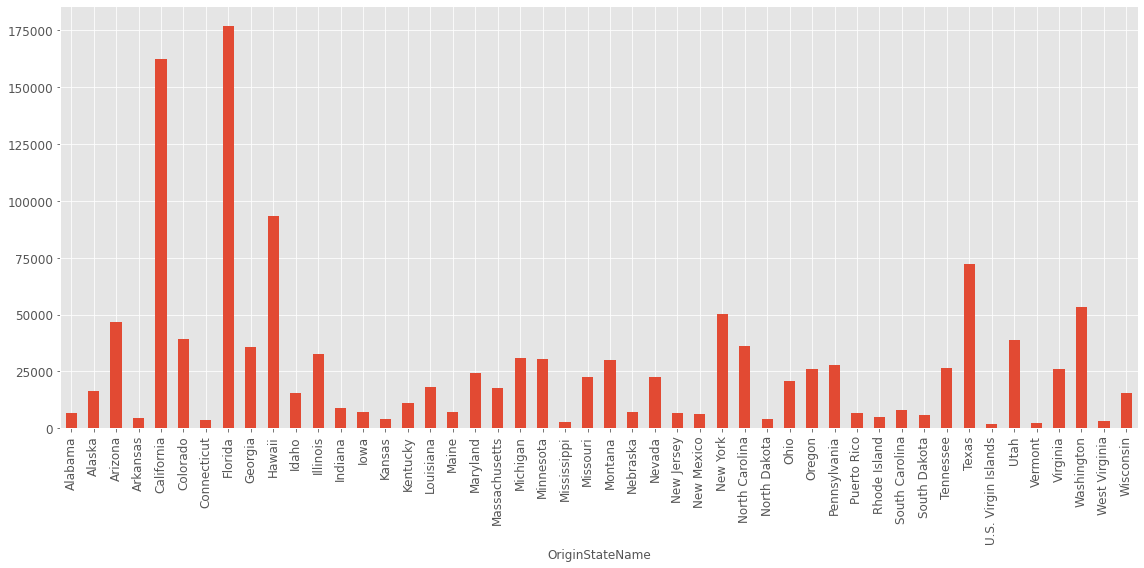

In [27]:
# show how many flights from each original states

plt.style.use('ggplot')
flight_pricing.groupby('OriginStateName').MktDistance.sum().plot(kind='bar',figsize=(16,8))
save_fig("CountOriginState")
plt.show()


Saving figure CountDestState


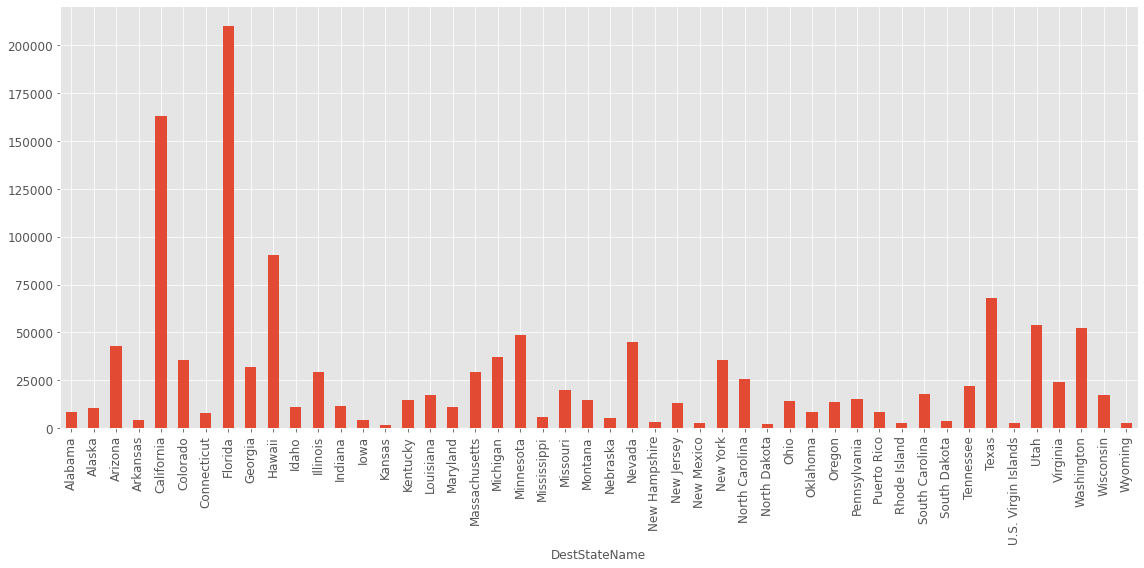

In [28]:
# show how many flights from each original states

flight_pricing.groupby('DestStateName').MktDistance.sum().plot(kind='bar',figsize=(16,8))
save_fig("CountDestState")
plt.show()


## Convert Catagorical Data

In [31]:
train_set.columns

Index(['Origin', 'OriginStateName', 'Dest', 'DestStateName', 'AirportGroup',
       'TkCarrier', 'Passengers', 'MktDistance', 'MktGeoType'],
      dtype='object')

In [32]:
# one hot encoding
# creat a function that will encode the catagorical data


from sklearn.preprocessing import OneHotEncoder# one hot encoding
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

def encode(train_set, test_set):
    train_set.set_index([pd.Index(range(0, train_set.shape[0]))], inplace=True)
    test_set.set_index([pd.Index(range(0, test_set.shape[0]))], inplace=True)
    
    ######################################### Training set
    # seeing categorical columns    
    cols = train_set.columns
    num_cols = train_set._get_numeric_data().columns
    cat_columns = list(set(cols) - set(num_cols))
    
    # seeing numerical columns    
    num_columns = list(num_cols)
    
    # creating categoical encoded data
    col_enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
    cols_data = col_enc.fit_transform(train_set[cat_columns])
    train_set.drop(cat_columns, axis = 1, inplace = True)
    cols_data = pd.DataFrame(cols_data)
    train_set = pd.concat([train_set, cols_data], axis= 1)
    
    # creating numerical encoded data    
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(train_set[num_columns])
    train_set.drop(num_columns, axis = 1, inplace = True)
    scaled = pd.DataFrame(scaled, columns = range(len(train_set.columns), len(train_set.columns)+scaled.shape[1]))
    train_set = pd.concat([train_set, scaled], axis= 1)
    
    ################################################ Testing Set
    # seeing categorical columns    
    cols = test_set.columns
    num_cols = test_set._get_numeric_data().columns
    cat_columns = list(set(cols) - set(num_cols))
    
    # seeing numerical columns    
    num_columns = list(num_cols)
    
    # creating categoical encoded data
    cols_data = col_enc.transform(test_set[cat_columns])
    test_set.drop(cat_columns, axis = 1, inplace = True)
    cols_data = pd.DataFrame(cols_data)
    test_set = pd.concat([test_set, cols_data], axis= 1)
    
    # creating numerical encoded data    
    scaled = scaler.transform(test_set[num_columns])
    test_set.drop(num_columns, axis = 1, inplace = True)
    scaled = pd.DataFrame(scaled, columns = range(len(test_set.columns), len(test_set.columns)+scaled.shape[1]))
    test_set = pd.concat([test_set, scaled], axis= 1)

    return train_set, test_set    

In [33]:
# run the train_set and test_set in our function
train_set, test_set = encode(train_set, test_set)

/Users/betty/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/betty/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [34]:
train_set.shape

(800, 1209)

In [35]:
test_set.shape

(200, 1209)

# Feature Selection


Select features according to the k highest scores.
`f_regression`will rank features in the same order 

In [36]:
train_set.shape

(800, 1209)

In [37]:
test_set.shape

(200, 1209)

In [38]:
#Select features according to the k highest scores.
#will rank features in the same order 



from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression

def select_features(train_set, train_set_label, test_set):
    fs = SelectKBest(score_func=f_regression, k="all")
    fs.fit(train_set, train_set_label)
    train_set_fs = fs.transform(train_set)
    test_set_fs = fs.transform(test_set)
    return train_set_fs, test_set_fs

In [39]:
fs = SelectKBest(score_func=f_regression, k='all')
train_set, test_set = select_features(train_set, train_set_label, test_set)

In [40]:
train_set.shape


(800, 1209)

In [41]:
test_set.shape


(200, 1209)

# Select and Train a Model

Train the data using diffrent models and select one that works for the data.

Linear regressor

Decision Tree

SVM

Random Tree Forest

### Linear Regressor

Train the model using linear regressor

In [42]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_set, train_set_label)
train_set_label

30392      45.00
550386    173.50
726263      5.00
574463    311.00
870743    415.00
           ...  
102560    136.02
257223      5.50
896004      5.50
459690    190.00
99843     182.58
Name: MktFare, Length: 800, dtype: float64

In [43]:
# let's try the full preprocessing pipeline on a few training instances
some_data = train_set[:5]
some_labels = train_set_label[:5]

print("Predictions:", lin_reg.predict(some_data))

Predictions: [ 45.125 185.5    10.25  289.5   424.5  ]


In [44]:
print("Labels:", list(some_labels))

Labels: [45.0, 173.5, 5.0, 311.0, 415.0]


Calculate the mean squared error

In [45]:
from sklearn.metrics import mean_squared_error

flight_pricing_predictions = lin_reg.predict(train_set)
lin_mse = mean_squared_error(train_set_label, flight_pricing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

26.83791729589407

In [46]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(train_set_label, flight_pricing_predictions)
lin_mae

12.297206249999999

### Decision Tree

Train the model using linear regressor

In [47]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(train_set, train_set_label)

DecisionTreeRegressor(random_state=42)

Calculate the mean squared error

In [48]:
flight_pricing_predictions = tree_reg.predict(train_set)
tree_mse = mean_squared_error(train_set_label, flight_pricing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

14.403847090997369

In [49]:
lin_mae = mean_absolute_error(train_set_label, flight_pricing_predictions)
lin_mae

2.4977708333333335

### SVM

Train the model using linear regressor

In [50]:
from sklearn.svm import SVR
svm_reg =SVR(kernel = 'linear')
svm_reg.fit(train_set, train_set_label)
flight_pricing_predictions = svm_reg.predict(train_set)
svm_mse = mean_squared_error(train_set_label, flight_pricing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

139.66859734528325

### Random Tree Forest

Train the model using linear regressor

In [51]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(train_set, train_set_label)

RandomForestRegressor(random_state=42)

Calculate the mean squared error

In [52]:
forest_reg.fit(train_set, train_set_label)
flight_pricing_predictions = forest_reg.predict(train_set)
forest_mse = mean_squared_error(train_set_label, flight_pricing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

54.72106916040829

In [53]:
lin_mae = mean_absolute_error(train_set_label, flight_pricing_predictions)
lin_mae

35.95799552142857

# Evaluation using Cross-Validation

We can use `cross_val_score` to perform cross-validation.

In [54]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, train_set, train_set_label, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [157.23700906 175.5582306  169.08527818 138.478606   154.22072931
 160.61233917 186.6320077  179.96737601 164.79050377 186.99271087]

Mean: 167.35747906717796
Standard deviation: 14.653909341568136


In [55]:
forest_scores = cross_val_score(forest_reg, train_set, train_set_label, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [120.21901754 157.91184547 158.31640639  91.4296929  126.34111841
 144.89167265 173.84112523 120.6794339  136.86116388 164.28739454]

Mean: 139.4778870899073
Standard deviation: 23.943037183109148


## Grid Search

We can use the `GridSearchCV` to tune hyperparameters.

In [56]:
from sklearn.model_selection import GridSearchCV
param_grid = {'splitter':['best','random'],'min_samples_split':[2,5,8,14,16,18,20],
              'max_depth': [1,3,4,5,8,16,32]}

grid_search_cv = GridSearchCV(DecisionTreeRegressor(random_state = 42), param_grid,verbose=1, cv=3 )
grid_search_cv.fit(train_set, train_set_label) # fit the training data
print("The best parameters are: ", grid_search_cv.best_params_)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
The best parameters are:  {'max_depth': 3, 'min_samples_split': 2, 'splitter': 'random'}


In [68]:
 from sklearn.model_selection import GridSearchCV
param_grid = {'splitter':['best','random'],'min_samples_split':[2,3,4],
              'max_depth': [1,2,3]}

grid_search_cv = GridSearchCV(DecisionTreeRegressor(random_state = 42), param_grid,verbose=1, cv=3 )
grid_search_cv.fit(train_set, train_set_label) # fit the training data
print("The best parameters are: ", grid_search_cv.best_params_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
The best parameters are:  {'max_depth': 3, 'min_samples_split': 2, 'splitter': 'random'}


In [69]:
grid_search_cv.best_params_

{'max_depth': 3, 'min_samples_split': 2, 'splitter': 'random'}

In [70]:
grid_search_cv.best_estimator_

DecisionTreeRegressor(max_depth=3, random_state=42, splitter='random')

Lets look at the final model

In [71]:
final_model = grid_search_cv.best_estimator_

final_model.fit(train_set, train_set_label)
flight_pricing_prediction = final_model.predict(train_set)
tree_mse = mean_squared_error(train_set_label, flight_pricing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

54.72106916040829

In [72]:
tree_mae = mean_absolute_error(train_set_label, flight_pricing_predictions)
tree_mae

35.95799552142857

In [64]:
test_set

array([[0.        , 0.        , 0.        , ..., 0.        , 0.06161711,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.01470588, 0.10601372,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.12632853,
        1.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.01470588, 0.31723396,
        1.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.13292076,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.32100094,
        0.        ]])

### Final prediction and RMSE

In [74]:
final_predictions = final_model.predict(test_set)
final_mse = mean_squared_error(test_set_label, final_predictions)
final_rmse = np.sqrt(final_mse)

In [75]:
final_rmse

143.54923615909976

### Discussion

From our analysis, we can conclude:

- Descion Tree model is the best model to accurately predict the average fair price. The final rmse is the most acceptable compared to the other models investigated
- Random forest was taking too much time and didn't predict very well 
- Other visualization techniques could be helpful to get a better understanding of the data

## Future Work

- The database have several attributes that doesn't affect the market fair price and maybe including external dataset attributes that affect the fair price might be helpful to increase our accuracy